In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split

In [2]:
diabetes = pd.read_csv('diabetes.csv')

In [3]:
diabetes

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Creating objects for hypertension and heart disease for exploration, encoded for gender for future modeling.

In [4]:
diabetes['hypertension_obj'] = np.where(diabetes.hypertension == 0, 'No', 'Yes')

In [5]:
diabetes['heart_obj'] = np.where(diabetes.heart_disease == 0, 'No', 'Yes')

In [6]:
diabetes['gender_encoded'] = np.where(diabetes.gender == 'Female', 0, 1)

In [7]:
diabetes.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_obj,heart_obj,gender_encoded
0,Female,80.0,0,1,never,25.19,6.6,140,0,No,Yes,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0,No,No,0
2,Male,28.0,0,0,never,27.32,5.7,158,0,No,No,1
3,Female,36.0,0,0,current,23.45,5.0,155,0,No,No,0
4,Male,76.0,1,1,current,20.14,4.8,155,0,Yes,Yes,1


In [8]:
diabetes.diabetes.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [9]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
 9   hypertension_obj     100000 non-null  object 
 10  heart_obj            100000 non-null  object 
 11  gender_encoded       100000 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 9.2+ MB


In [10]:
diabetes.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
hypertension_obj       0
heart_obj              0
gender_encoded         0
dtype: int64

In [11]:
for col in diabetes.select_dtypes(include='object'):
    print('')
    print(diabetes[col].value_counts())
    print('')
    print('---------------------------')


Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

---------------------------

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

---------------------------

No     92515
Yes     7485
Name: hypertension_obj, dtype: int64

---------------------------

No     96058
Yes     3942
Name: heart_obj, dtype: int64

---------------------------


/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

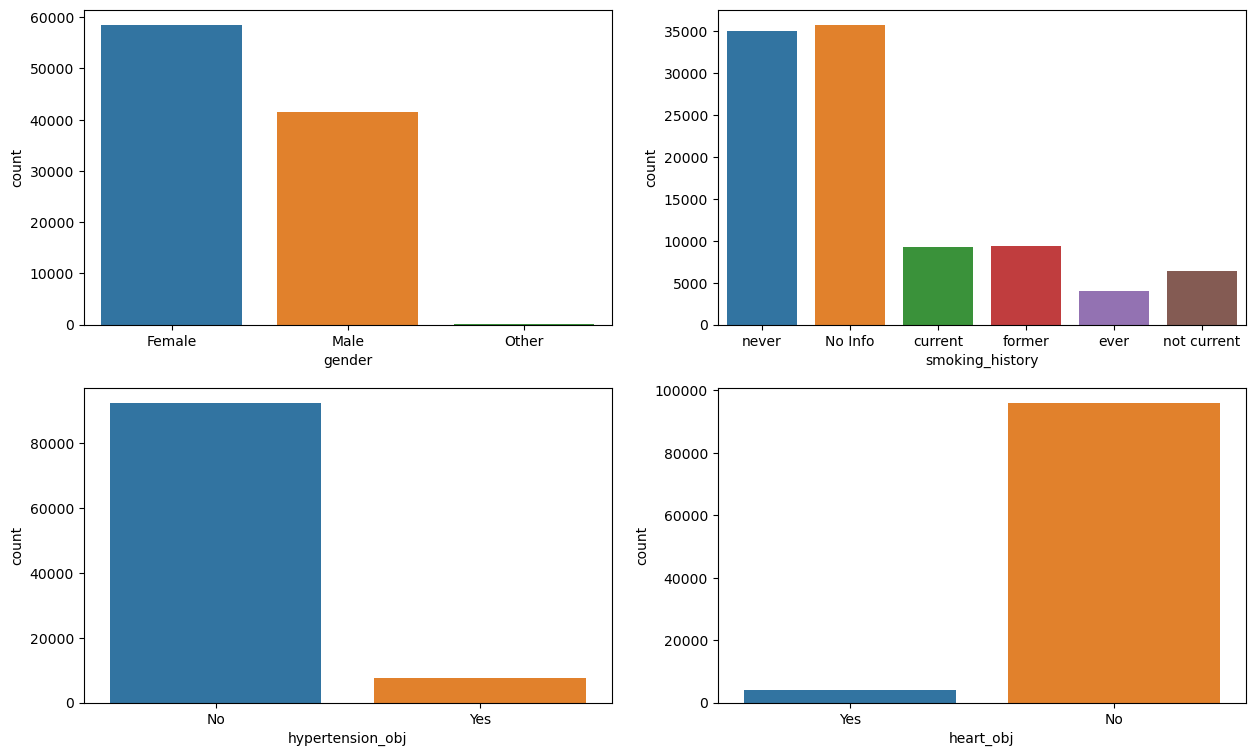

In [12]:
plt.figure(figsize=(15,9))
for i, col in enumerate(diabetes.select_dtypes(include='object')):
    plt.subplot(2,2,(i+1))
    sns.countplot(diabetes[col])
plt.show()

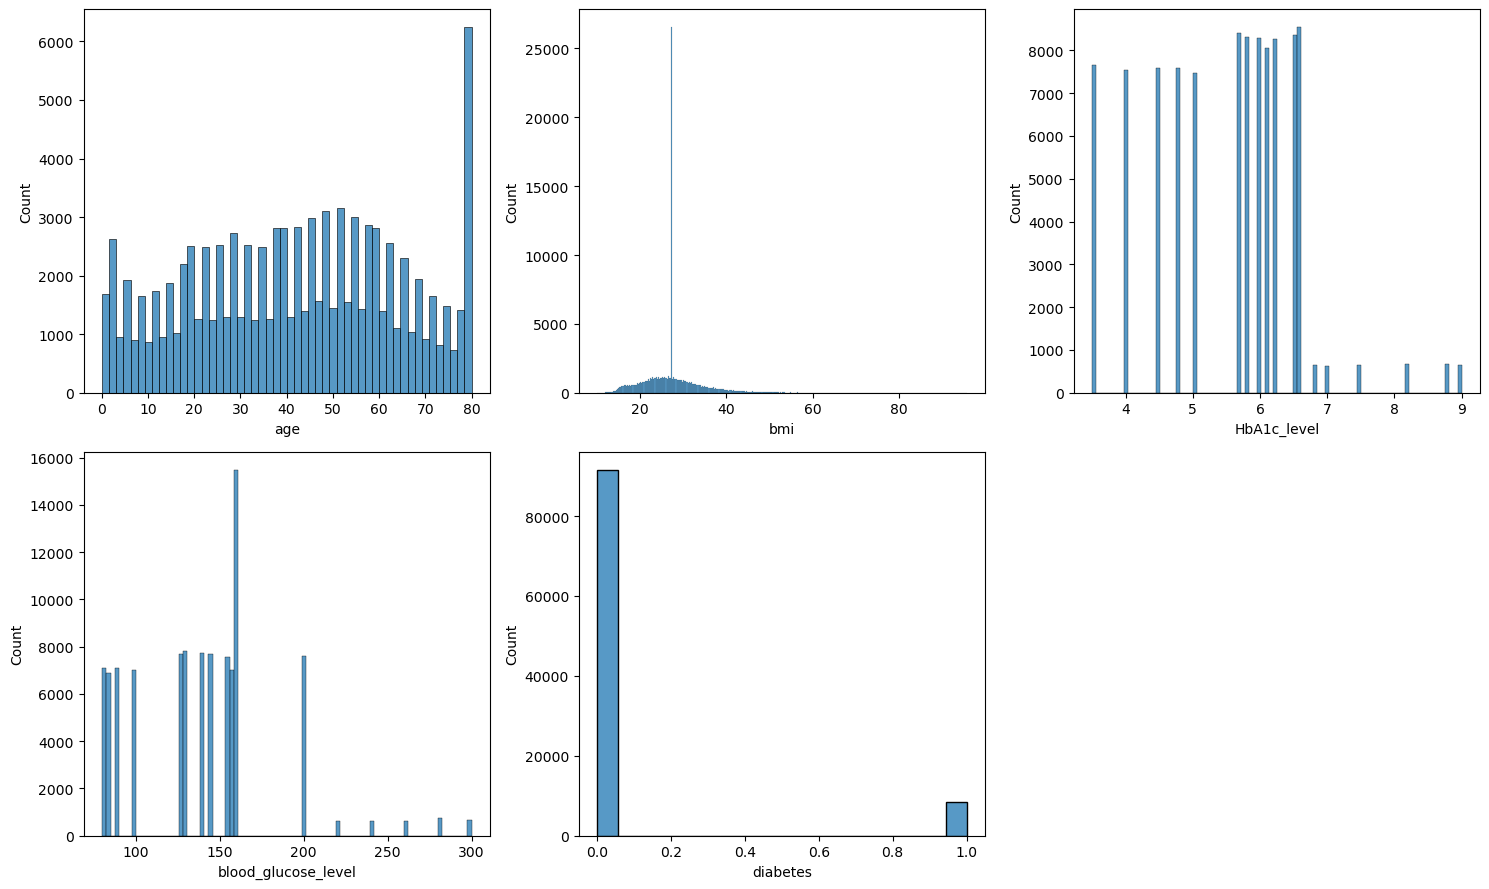

In [13]:
plt.figure(figsize=(15,9))
for i, col in enumerate(diabetes[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]):
    plt.subplot(2,3,(i+1))
    sns.histplot(diabetes[col])
plt.tight_layout()
plt.show()

Something looks off about BMI. There seems to be one very specific value that throws off the entire, otherwise-normally-distributed, histogram.

In [14]:
diabetes.bmi.value_counts().head(3)

27.32    25495
23.00      103
27.12      101
Name: bmi, dtype: int64

In [15]:
len(diabetes[diabetes.bmi == 27.32]) / len(diabetes)

0.25495

I'll remove that value... that's bizarre that so many have such a very specific BMI measurement

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/an

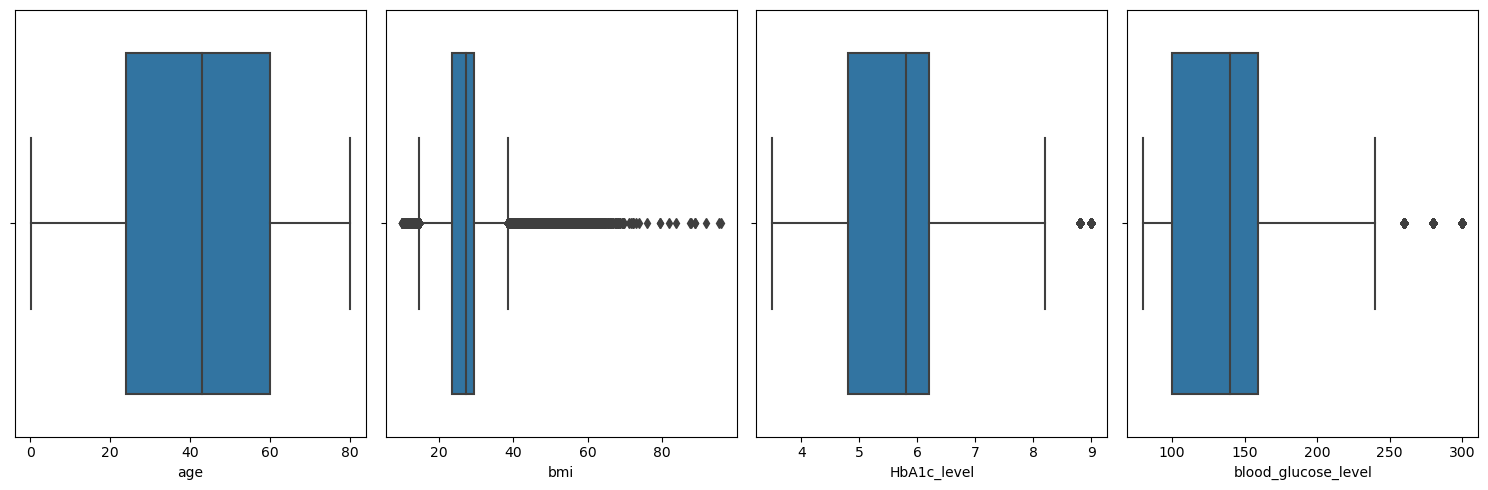

In [16]:
plt.figure(figsize=(15,5))
for i, col in enumerate(diabetes[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']]):
    plt.subplot(1,4,(i+1))
    sns.boxplot(diabetes[col])
plt.tight_layout()
plt.show()

/usr/local/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

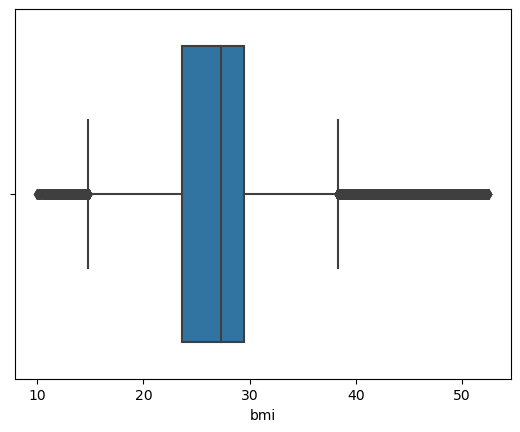

In [17]:
sns.boxplot(diabetes[diabetes.bmi < diabetes.bmi.quantile(.995)].bmi)

Things to do:

- Fix age so it's rounded to the nearest whole number and converted to integer
- Drop smoking_history for MVP since No Info makes up 36% the dataset.
- Given the oddly high amount of occurences, remove all BMI values that are exactly 27.32
- Reduce BMI to snip out top .05% of values
- Drop "Other" from gender since it's only .02% of dataset
- Keeping 0s and 1s in hypertension, heart disease, and diabetes, will relabel to Yes and No to clarify during exploration on graphs alone.

In [18]:
diabetes.age = round(diabetes.age, 0).astype(int)

In [19]:
diabetes = diabetes.drop(columns='smoking_history')

In [20]:
diabetes = diabetes[diabetes.bmi != 27.32]

In [21]:
diabetes = diabetes[diabetes.bmi < diabetes.bmi.quantile(.995)]

In [22]:
diabetes = diabetes[diabetes.gender != 'Other']

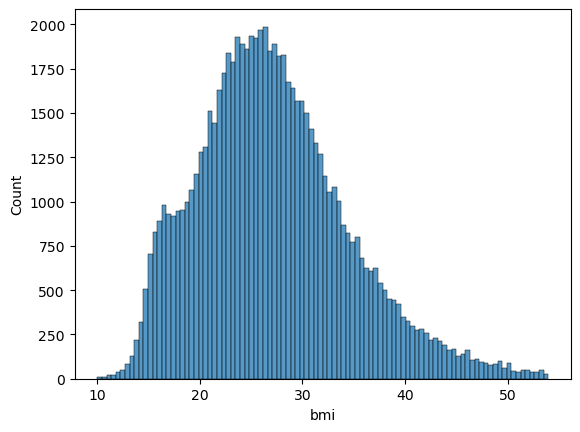

In [23]:
sns.histplot(diabetes.bmi)
plt.show() #This looks much better

In [24]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74120 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               74120 non-null  object 
 1   age                  74120 non-null  int64  
 2   hypertension         74120 non-null  int64  
 3   heart_disease        74120 non-null  int64  
 4   bmi                  74120 non-null  float64
 5   HbA1c_level          74120 non-null  float64
 6   blood_glucose_level  74120 non-null  int64  
 7   diabetes             74120 non-null  int64  
 8   hypertension_obj     74120 non-null  object 
 9   heart_obj            74120 non-null  object 
 10  gender_encoded       74120 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 6.8+ MB


In [25]:
74120/100000

0.7412

We are left with 74.12% of the data

***Note! Regarding blood_glucose_level***

Looking at the Discussion Board on Kaggle, it is unclear as to how this measurement was taken. Blood glucose tests have an additional parameter as to whether or not the patient was fasting when this value was obtained. Fasting/no fasting greatly influences this value. However, for MVP, this will remain in the dataframe at least through exploration.

From Kaggle:
> The dataset does not specify whether the glucose levels represent the last blood glucose check of a 2-hour glucose tolerance test or the first check after an eight-hour fasting. Instead, the measurements seem to be taken without specific fasting requirements or as part of a standardized test.

In [26]:
def split_data(df, target):
    '''
    Takes in a DataFrame and returns train, validate, and test DataFrames; stratifies on target argument.
    
    Train, Validate, Test split is: 60%, 20%, 20% of input dataset, respectively.
    '''
    # First round of split (train+validate and test)
    train_validate, test = train_test_split(df, test_size=.2, random_state=123, stratify=df[target])

    # Second round of split (train and validate)
    train, validate = train_test_split(train_validate, 
                                       test_size=.30, 
                                       random_state=123, 
                                       stratify=train_validate[target])
    return train, validate, test

In [27]:
train, validate, test = split_data(diabetes, 'diabetes')

In [28]:
train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_obj,heart_obj,gender_encoded
97196,Female,53,0,0,34.49,4.0,85,0,No,No,0
2129,Male,5,0,0,16.17,3.5,80,0,No,No,1
77812,Male,44,0,0,39.61,3.5,90,0,No,No,1
94778,Female,32,0,0,23.23,6.6,160,0,No,No,0
28491,Female,20,0,0,20.74,6.0,90,0,No,No,0


In [29]:
validate.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_obj,heart_obj,gender_encoded
24263,Male,28,0,0,28.23,6.5,140,0,No,No,1
56090,Male,80,1,1,21.14,6.8,145,1,Yes,Yes,1
67971,Male,29,0,0,28.23,5.8,140,0,No,No,1
26511,Male,1,0,0,17.41,5.7,160,0,No,No,1
55209,Female,47,1,0,31.11,3.5,140,0,Yes,No,0


In [30]:
test.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_obj,heart_obj,gender_encoded
37557,Female,6,0,0,15.91,6.5,126,0,No,No,0
56594,Female,46,0,0,31.17,6.1,90,0,No,No,0
60656,Male,80,0,0,18.93,5.0,80,0,No,No,1
76771,Male,5,0,0,17.53,4.0,200,0,No,No,1
6950,Male,15,0,0,32.13,4.0,126,0,No,No,1


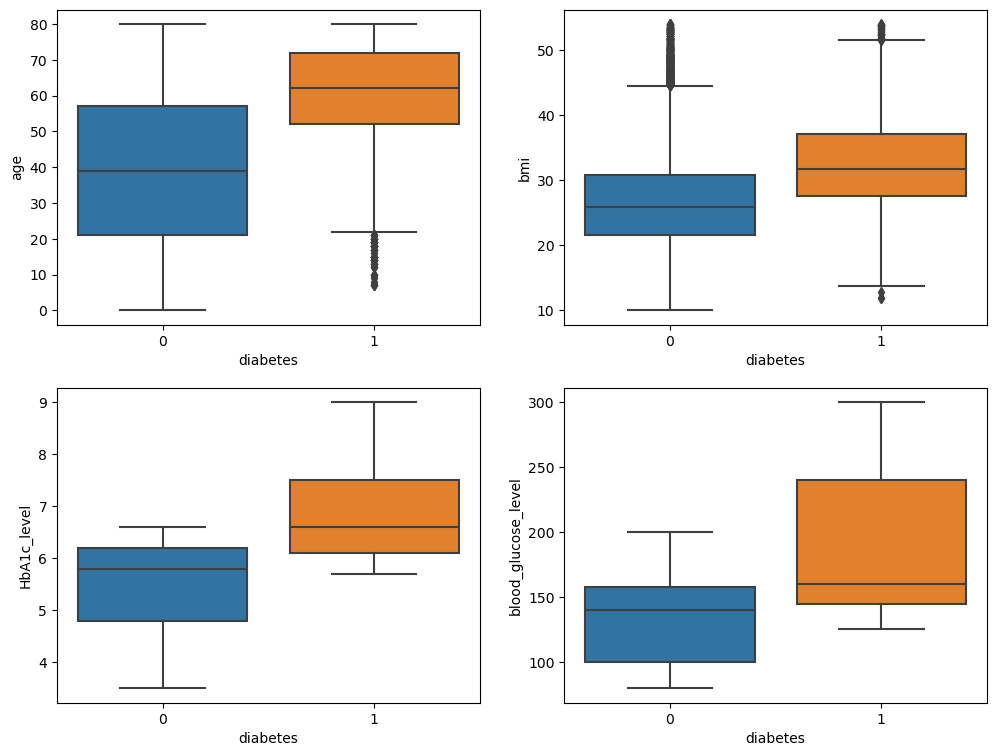

In [31]:
plt.figure(figsize=(12,9))
for i, col in enumerate(train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']]):
    if col != 'diabetes':
        plt.subplot(2,2,(i+1))
        sns.boxplot(data=train, x='diabetes', y=col).set
plt.show()

In [32]:
train.gender.value_counts()

Female    24740
Male      16767
Name: gender, dtype: int64

In [33]:
pd.crosstab(train['gender'], train.diabetes)

diabetes,0,1
gender,,
Female,22700,2040
Male,14972,1795


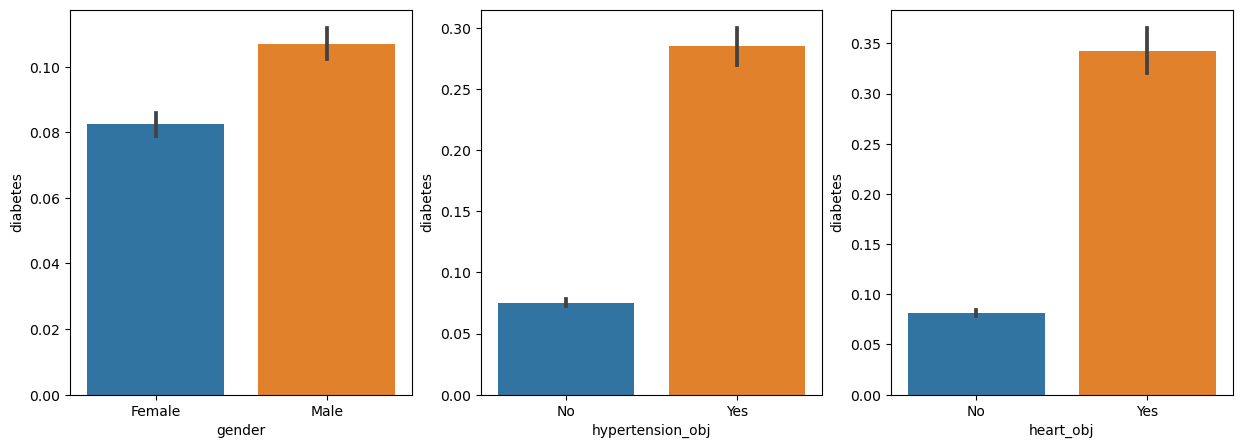

In [34]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, col in enumerate(train[['gender', 'hypertension_obj', 'heart_obj', 'diabetes']]):
    if col != 'diabetes':
        pct = pd.crosstab(train[col], train.diabetes)
        sns.barplot(ax=axes[i], data=train, x=col, y='diabetes')

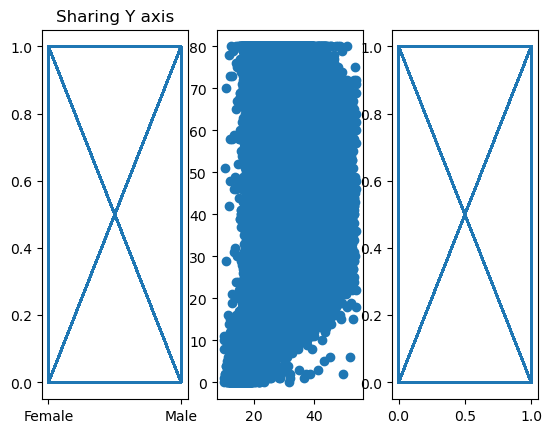

In [35]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)

ax1.plot(train.gender, train.diabetes)
ax1.set_title('Sharing Y axis')
ax2.scatter(train.bmi, train.age)
ax3.plot(train.hypertension, train.diabetes)

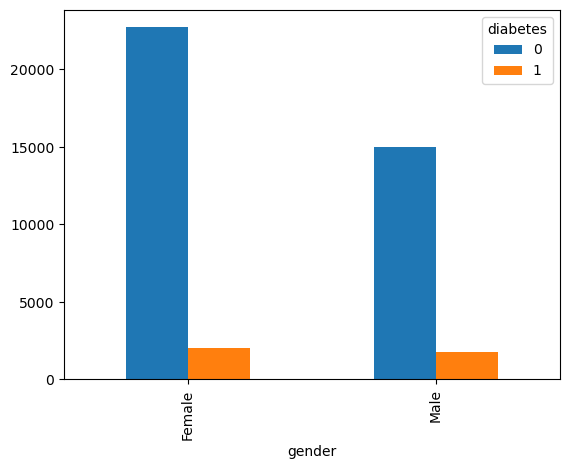

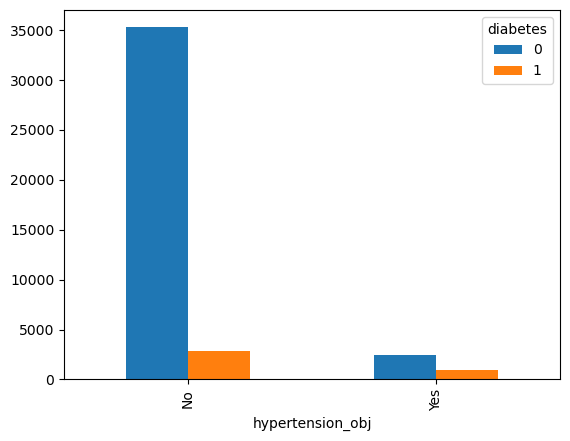

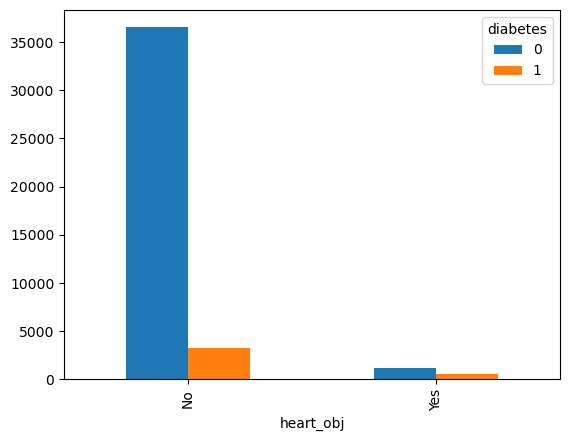

In [36]:
#fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, col in enumerate(train[['gender', 'hypertension_obj', 'heart_obj', 'diabetes']]):
#    plt.figure(figsize=(12,9))
    if col != 'diabetes':
        pct = pd.crosstab(train[col], train.diabetes)
        pct.plot.bar()

plt.show()

In [37]:
from itertools import combinations

pairwise_combinations = list(combinations(train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].columns, 2))

pairwise_combinations

[('age', 'bmi'),
 ('age', 'HbA1c_level'),
 ('age', 'blood_glucose_level'),
 ('bmi', 'HbA1c_level'),
 ('bmi', 'blood_glucose_level'),
 ('HbA1c_level', 'blood_glucose_level')]

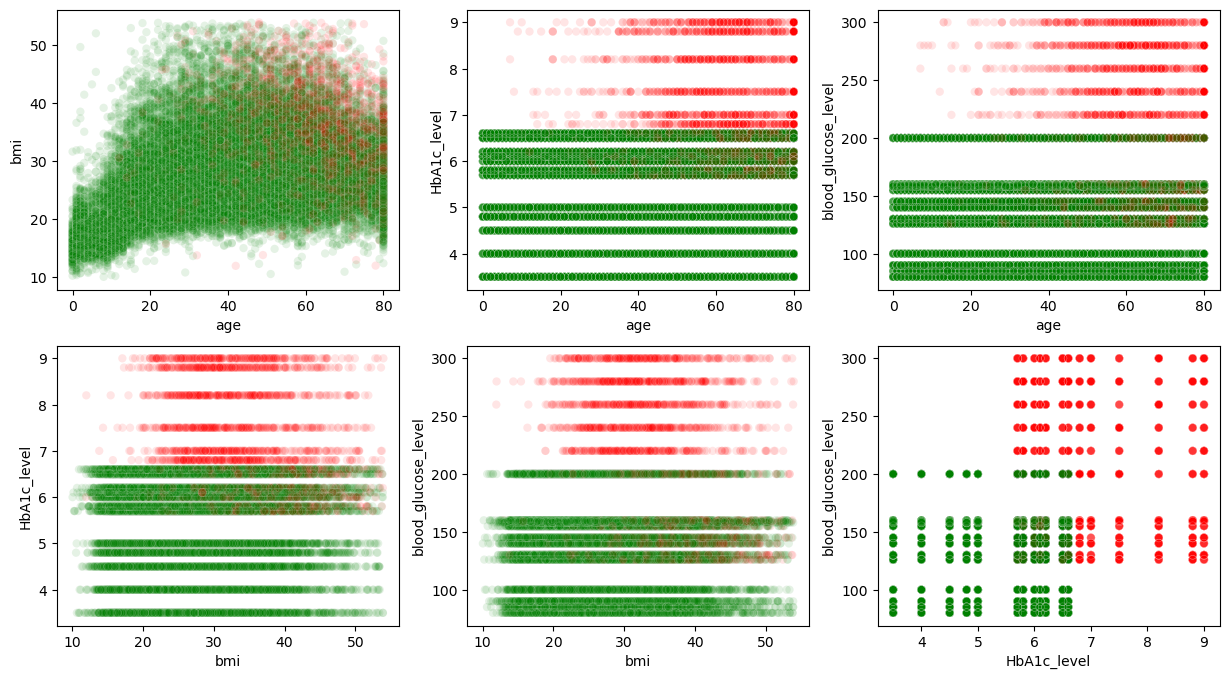

In [38]:
plt.figure(figsize=(15, 8))
x=1
for i in pairwise_combinations:
    plt.subplot(2,3,x)
    sns.scatterplot(data=train, x=i[0], y=i[1], hue='diabetes', palette=['green', 'red'], alpha=0.1)
    plt.legend([], [], frameon=False)
    x = x+1

plt.show()

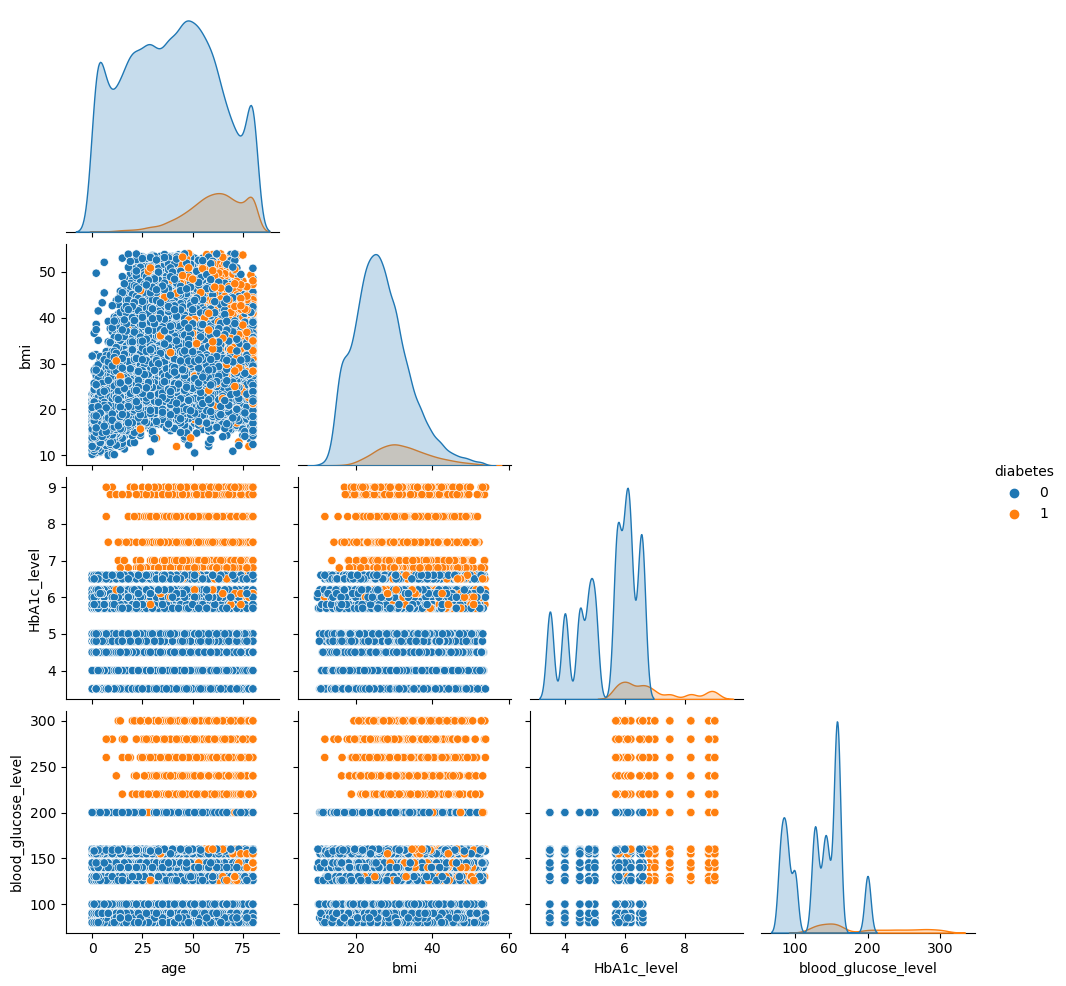

In [39]:
sns.pairplot(train[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes']], hue='diabetes', corner=True)
plt.show()

I'm starting to not like pairplots... I don't really need a repeat of histograms, and there's a lot of dead whitespace that forces me to scroll to see how variables interact. Will probably delete this and just do scatterplots using itertools moving forward.

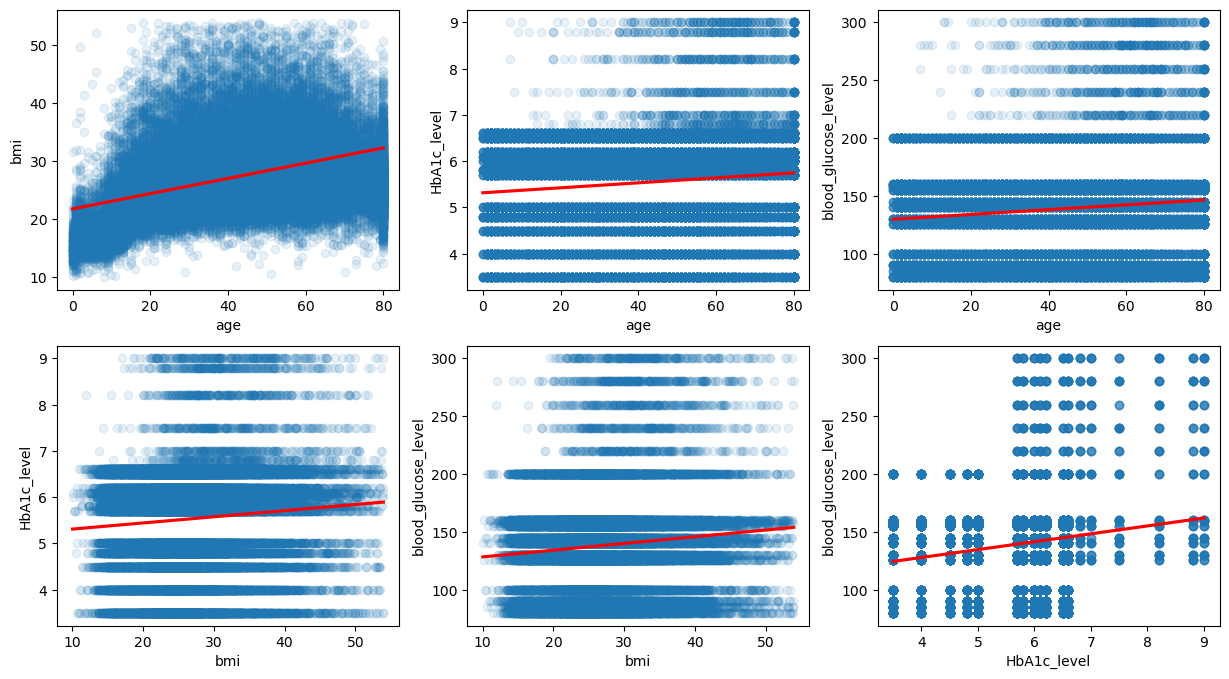

In [40]:
plt.figure(figsize=(15, 8))
x=1
for i in pairwise_combinations:
    plt.subplot(2,3,x)
    sns.regplot(data=train, x=i[0], y=i[1], scatter_kws={'alpha': 0.1}, line_kws={'color': 'red'})
    plt.legend([], [], frameon=False)
    x = x+1

plt.show()

Stats Tests to Run:

For Multicollinearity:

    HbA1c and blood-glucose_level
    Age and BMI
    
For Statistical Significance with Target:

    Chi-Squared:
        - Gender and Target
        - Hypertension and Target
        - Heart Disease and Target
        
    Comparison of Means:
        - Age and Target
        - BMI
        - HbA1c
        - blood glucose level

H0 : No multicollinearity between HbA1C and glucose

Ha : Yes

In [41]:
corr, p = stats.pearsonr(train.HbA1c_level, train.blood_glucose_level)

corr, p

(0.17728789499148315, 3.2995595398567704e-290)

H0 : No multicollinearity between age and bmi

Ha : Yes

In [42]:
def check_chi_squared(train, categorical):
    results = pd.DataFrame()
    for x in train[categorical]:
        observed = pd.crosstab(train[x], train.diabetes)
        chi2, p, degf, expected = stats.chi2_contingency(observed)
        result = pd.DataFrame({'variable': [x]
                               ,'chi_2': [chi2]
                               ,'p_value': [p]})
        results = pd.concat([results, result])
                            
    return results.sort_values('p_value').reset_index(drop=True)

In [43]:
check_chi_squared(train, ['gender', 'hypertension', 'heart_disease'])

,variable,chi_2,p_value
0,hypertension,1636.115636,0.000000e+00
1,heart_disease,1385.388510,3.144480e-303
2,gender,71.816186,2.362067e-17


In [44]:
corr, p = stats.pearsonr(train.age, train.bmi)

corr, p

(0.4073883847726786, 0.0)

H0 : No relation between gender and diabetes

Ha : Yes

In [45]:
observed = pd.crosstab(train.gender, train.diabetes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [46]:
pd.DataFrame(observed), pd.DataFrame(expected)

(diabetes      0     1
 gender               
 Female    22700  2040
 Male      14972  1795,
               0            1
 0  22454.171104  2285.828896
 1  15217.828896  1549.171104)

In [47]:
chi2, p

(71.81618647731163, 2.3620667610418573e-17)

H0 : No relation between hypertension and diabetes

Ha : Yes

In [48]:
observed = pd.crosstab(train.hypertension_obj, train.diabetes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [49]:
pd.DataFrame(observed), pd.DataFrame(expected)

(diabetes              0     1
 hypertension_obj             
 No                35255  2869
 Yes                2417   966,
               0            1
 0  34601.569085  3522.430915
 1   3070.430915   312.569085)

In [50]:
chi2, p # Null hypothesis is rejected

(1636.1156363764965, 0.0)

H0 : No relation between heart_disease and diabetes

Ha : Yes

In [51]:
observed = pd.crosstab(train.heart_obj, train.diabetes)

chi2, p, degf, expected = stats.chi2_contingency(observed)

In [52]:
pd.DataFrame(observed), pd.DataFrame(expected)

(diabetes       0     1
 heart_obj             
 No         36505  3226
 Yes         1167   609,
              0           1
 0  36060.09184  3670.90816
 1   1611.90816   164.09184)

In [53]:
chi2, p # Null hypothesis is rejected

(1385.3885095472406, 3.144480154789347e-303)

#### Now for comparison of means

age, bmi, hb1ac, glucose

#### Age

In [54]:
stats.levene(train[train.diabetes == 0].age, train[train.diabetes == 1].age)

LeveneResult(statistic=1452.6121693366917, pvalue=1.95707323888e-312)

In [55]:
train[train.diabetes == 0].age.var()

503.62193139994093

In [56]:
train[train.diabetes == 1].age.var()

209.91073867999202

In [57]:
stats.ttest_ind(train[train.diabetes == 0].age, train[train.diabetes == 1].age, equal_var=False)

Ttest_indResult(statistic=-82.0563516201688, pvalue=0.0)

In [58]:
train[train.diabetes == 0].age.mean(), train[train.diabetes == 1].age.mean()

(39.16664897005734, 60.58070404172099)

In [59]:
def check_comparison_of_means(train, numeric):
    results = pd.DataFrame()
    for x in train[numeric]:
        stat, pval = stats.levene(train[train.diabetes == 0][x], train[train.diabetes == 1][x])
        if pval < 0.05:
            variance = False
            t, p = stats.ttest_ind(train[train.diabetes == 0][x], train[train.diabetes == 1][x], equal_var=False)
            result = pd.DataFrame({'variable': [x]
                                   ,'equal_variance': [variance]
                                   ,'t_stat': [t]
                                   ,'p_value': [p]})
            results = pd.concat([results, result])
        else:
            variance = True
            t, p = stats.ttest_ind(train[train.diabetes == 0][x], train[train.diabetes == 1][x], equal_var=False)
            result = pd.DataFrame({'variable': [x]
                                   ,'equal_variance': [variance]
                                   ,'t_stat': [t]
                                   ,'p_value': [p]})
            results = pd.concat([results, result])
    return results.sort_values('t_stat').reset_index(drop=True)

In [60]:
check_comparison_of_means(train, ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level'])

,variable,equal_variance,t_stat,p_value
0,HbA1c_level,False,-83.927300,0.0
1,age,False,-82.056352,0.0
2,blood_glucose_level,False,-63.592501,0.0
3,bmi,True,-49.808946,0.0


#### BMI

In [61]:
stats.levene(train[train.diabetes == 0].bmi, train[train.diabetes == 1].bmi)

LeveneResult(statistic=2.2738063894917646, pvalue=0.13158400107939153)

In [62]:
stats.ttest_ind(train[train.diabetes == 0].bmi, train[train.diabetes == 1].bmi, equal_var=True)

Ttest_indResult(statistic=-49.99213107316776, pvalue=0.0)

In [63]:
train[train.diabetes == 0].bmi.mean(), train[train.diabetes == 1].bmi.mean()

(26.60713421108511, 32.646571056062626)

#### HbA1c

In [64]:
stats.levene(train[train.diabetes == 0].HbA1c_level, train[train.diabetes == 1].HbA1c_level)

LeveneResult(statistic=6.635718325022342, pvalue=0.009998813360279496)

In [65]:
stats.ttest_ind(train[train.diabetes == 0].HbA1c_level, train[train.diabetes == 1].HbA1c_level, equal_var=False)

Ttest_indResult(statistic=-83.92730014068846, pvalue=0.0)

In [66]:
train[train.diabetes == 0].HbA1c_level.mean(), train[train.diabetes == 1].HbA1c_level.mean()

(5.398776279465449, 6.902633637548827)

#### Blood glucose

In [67]:
stats.levene(train[train.diabetes == 0].blood_glucose_level, train[train.diabetes == 1].blood_glucose_level)

LeveneResult(statistic=2985.470902051092, pvalue=0.0)

In [68]:
stats.ttest_ind(train[train.diabetes == 0].blood_glucose_level, train[train.diabetes == 1].blood_glucose_level, equal_var=False)

Ttest_indResult(statistic=-63.592500597350245, pvalue=0.0)

In [69]:
train[train.diabetes == 0].blood_glucose_level.mean(), train[train.diabetes == 1].blood_glucose_level.mean()

(132.6696485453387, 194.12411994784875)

### Exploration Summary

No multicollinearity between HbA1c and blood glucose
No multicollineartiy between age and BMI

Means:

|Diabetes: | No | Yes |
| --- | --- | --- |
|Age| 39 | 61 |
|BMI| 26.6 | 32.4 |
|HbA1c| 5.4 | 6.9 |
|Blood Glucose|133|195|

- All variables are correlated with diabetes, with HbA1c being the strongest (T-stat = -88), just barely beating Age (-85).

| Variable | Chi$^2$ | P-Value |
| --- | --- | --- |
| Gender | 80 | 3.92 $\times$ 10$^{-19}$ |
| Hypertension | 1625 | 0 |
| Heart Disease | 1252 | 2.42 $\times$ 10$^{274}$ |

| Variable | T-Statistic | P-Value | 
| --- | --- | --- |
| Age | -85 | 0 |
| BMI | -50 | 0 |
| HbA1C | -88 | 0 |
| Blood glucose | -66 | 0 |

We will moving forward will all variables when we head into modeling.

# Modeling

In [70]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [71]:
#Set baseline

In [72]:
len(train[train.diabetes == 0]) / len(train)

0.9076059459850145

In [73]:
train.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,hypertension_obj,heart_obj,gender_encoded
97196,Female,53,0,0,34.49,4.0,85,0,No,No,0
2129,Male,5,0,0,16.17,3.5,80,0,No,No,1
77812,Male,44,0,0,39.61,3.5,90,0,No,No,1
94778,Female,32,0,0,23.23,6.6,160,0,No,No,0
28491,Female,20,0,0,20.74,6.0,90,0,No,No,0


In [74]:
features = ['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'gender_encoded']

X_train = train[features]
y_train = train.diabetes

X_validate = validate[features]
y_validate = validate.diabetes

X_test = test[features]
y_test = test.diabetes

In [75]:
def classification_models_performance(X_train, y_train, X_validate, y_validate):
    '''Takes split train/validate sets to produce performance of model across all four classification models.
    '''
    # hyper_value has been hard coded because each model has already been run through a for-loop and hyper_value selected for best hyperparameter performance.

    scores = pd.DataFrame({}) # To add performance of each model to a DataFrame.
    
    # Decision Tree

    dtc = DecisionTreeClassifier(max_depth=6)
    dtc.fit(X_train, y_train)

    score = pd.DataFrame({'model': ['Decision Tree']
                        , 'train': [dtc.score(X_train, y_train)]
                        , 'validate': [dtc.score(X_validate, y_validate)]
                        , 'hyper_value': [6]
                        , 'difference': [(dtc.score(X_train, y_train) - dtc.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score])

    # Random Forest

    rfc = RandomForestClassifier(max_depth=6, min_samples_leaf=5, random_state=123)
    rfc.fit(X_train, y_train)
# find where to put random state
    score = pd.DataFrame({'model': ['Random Forest']
                        , 'train': [rfc.score(X_train, y_train)]
                        , 'validate': [rfc.score(X_validate, y_validate)]
                        , 'hyper_value': [6]
                        , 'difference': [(rfc.score(X_train, y_train) - rfc.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score])

    # KNN

    knn = KNeighborsClassifier(n_neighbors=8)
    knn.fit(X_train, y_train)

    score = pd.DataFrame({'model': ['KNN']
                        , 'train': [knn.score(X_train, y_train)]
                        , 'validate': [knn.score(X_validate, y_validate)]
                        , 'hyper_value': [8]
                        , 'difference': [(knn.score(X_train, y_train) - knn.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score])

    # Logistic Regression

    lr = LogisticRegression(C=10)
    lr.fit(X_train, y_train)

    score = pd.DataFrame({'model': ['Logistic Regression']
                        , 'train': [lr.score(X_train, y_train)]
                        , 'validate': [lr.score(X_validate, y_validate)]
                        , 'hyper_value': [10]
                        , 'difference': [(lr.score(X_train, y_train) - lr.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score]).reset_index(drop=True)

    return scores

**Decision Tree**

In [76]:
scores = pd.DataFrame({})

for x in range(1,21):
    dtc = DecisionTreeClassifier(max_depth=x)
    dtc.fit(X_train, y_train)

    score = pd.DataFrame({'model': ['Decision Tree']
                        , 'train': [dtc.score(X_train, y_train)]
                        , 'validate': [dtc.score(X_validate, y_validate)]
                        , 'hyper_value': [x]
                        , 'abs_difference': [abs(dtc.score(X_train, y_train) - dtc.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score])

scores.sort_values('abs_difference')

,model,train,validate,hyper_value,abs_difference
0,Decision Tree,0.970487,0.970431,10,0.000056
0,Decision Tree,0.969836,0.970825,9,0.000988
0,Decision Tree,0.971451,0.969813,11,0.001638
0,Decision Tree,0.969451,0.971443,8,0.001992
0,Decision Tree,0.969090,0.971162,2,0.002072
0,Decision Tree,0.969090,0.971162,3,0.002072
0,Decision Tree,0.969090,0.971162,4,0.002072
0,Decision Tree,0.969090,0.971162,5,0.002072
0,Decision Tree,0.969090,0.971162,6,0.002072
0,Decision Tree,0.969090,0.971162,7,0.002072


10 wins out

**Random Forest**

In [77]:
scores = pd.DataFrame({})

# Random Forest

for x in range(1,11):
    rfc = RandomForestClassifier(max_depth=x, min_samples_leaf=(11-x), random_state=123)
    rfc.fit(X_train, y_train)
    # find where to put random state
    score = pd.DataFrame({'model': ['Random Forest']
                        , 'train': [rfc.score(X_train, y_train)]
                        , 'validate': [rfc.score(X_validate, y_validate)]
                        , 'max_depth': [x]
                        , 'min_samples_leaf': [(11-x)]
                        , 'abs_difference': [abs(rfc.score(X_train, y_train) - rfc.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score])

scores.sort_values('abs_difference')

,model,train,validate,max_depth,min_samples_leaf,abs_difference
0,Random Forest,0.970150,0.971331,10,1,0.001181
0,Random Forest,0.948756,0.950082,2,9,0.001326
0,Random Forest,0.921700,0.923155,1,10,0.001455
0,Random Forest,0.969523,0.971218,9,2,0.001695
0,Random Forest,0.969138,0.971162,8,3,0.002024
0,Random Forest,0.969090,0.971162,3,8,0.002072
0,Random Forest,0.969090,0.971162,4,7,0.002072
0,Random Forest,0.969090,0.971162,5,6,0.002072
0,Random Forest,0.969090,0.971162,6,5,0.002072
0,Random Forest,0.969090,0.971162,7,4,0.002072


**KNN**

In [78]:
import warnings
warnings.filterwarnings("ignore")

In [79]:
scores = pd.DataFrame({})

# KNN
for x in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=x)
    knn.fit(X_train, y_train)
    score = pd.DataFrame({'model': ['KNN']
                        , 'train': [knn.score(X_train, y_train)]
                        , 'validate': [knn.score(X_validate, y_validate)]
                        , 'n_neighbors': [x]
                        , 'abs_difference': [abs(knn.score(X_train, y_train) - knn.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score])

scores.sort_values('abs_difference')

,model,train,validate,n_neighbors,abs_difference
0,KNN,0.948250,0.947833,16,0.000417
0,KNN,0.947334,0.946540,20,0.000794
0,KNN,0.947599,0.946765,18,0.000834
0,KNN,0.948177,0.947215,19,0.000963
0,KNN,0.948900,0.947777,14,0.001123
0,KNN,0.949695,0.948508,15,0.001188
0,KNN,0.949743,0.948339,12,0.001405
0,KNN,0.950731,0.949070,13,0.001662
0,KNN,0.949117,0.947439,17,0.001678
0,KNN,0.950900,0.948901,10,0.001999


**Logistic Regression**

In [80]:
10**-2

0.01

In [81]:
scores = pd.DataFrame({})

# Logistic Regression

for x in range(-2,4):
    lr = LogisticRegression(C=10**x)
    lr.fit(X_train, y_train)

    score = pd.DataFrame({'model': ['Logistic Regression']
                        , 'train': [lr.score(X_train, y_train)]
                        , 'validate': [lr.score(X_validate, y_validate)]
                        , 'hyper_value': [10**x]
                        , 'abs_difference': [abs(lr.score(X_train, y_train) - lr.score(X_validate, y_validate))]})

    scores = pd.concat([scores, score]).reset_index(drop=True)

scores.sort_values('abs_difference')

,model,train,validate,hyper_value,abs_difference
5,Logistic Regression,0.955309,0.958008,1000.00,0.002699
0,Logistic Regression,0.955983,0.958739,0.01,0.002755
2,Logistic Regression,0.954996,0.957783,1.00,0.002787
4,Logistic Regression,0.956730,0.959638,100.00,0.002908
1,Logistic Regression,0.955212,0.958401,0.10,0.003189
3,Logistic Regression,0.950442,0.954635,10.00,0.004193


In [82]:
classification_models_performance(X_train, y_train, X_validate, y_validate)

,model,train,validate,hyper_value,difference
0,Decision Tree,0.969090,0.971162,6,-0.002072
1,Random Forest,0.969090,0.971162,6,-0.002072
2,KNN,0.951912,0.949632,8,0.002280
3,Logistic Regression,0.950442,0.954635,10,-0.004193


In [83]:
dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(X_train, y_train)
dtc.score(X_test, y_test)

0.9690366972477065

In [84]:
rfc = RandomForestClassifier(max_depth=10, min_samples_leaf=1, random_state=123)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.9699136535348084